<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/sacarsmdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files

# Install Kaggle library
!pip install -q kaggle
uploaded = files.upload()

Saving Sarcasm_Headlines_Dataset.json to Sarcasm_Headlines_Dataset.json


Upload training data

In [0]:
import pandas as pd
import io
data = pd.read_json(io.BytesIO(uploaded['Sarcasm_Headlines_Dataset.json']), lines=True) #data is trainset

In [0]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


Upload testingdata

In [3]:
uploaded=files.upload()

Saving Sarcasm_Headlines_Dataset_v2.json to Sarcasm_Headlines_Dataset_v2.json


In [0]:
df = pd.read_json(io.BytesIO(uploaded['Sarcasm_Headlines_Dataset_v2.json']), lines=True) #testset

split data 80% training set and 20% test set

In [0]:
temp=len(df['headline'])
df_split= df.iloc[round(temp*0.4):temp]
data=pd.concat([data,df_split],ignore_index=True)
df=df.iloc[0:round(temp*0.4)]

In [6]:
data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
43875,https://www.theonion.com/jews-to-celebrate-ros...,jews to celebrate rosh hashasha or something,1
43876,https://local.theonion.com/internal-affairs-in...,internal affairs investigator disappointed con...,1
43877,https://www.huffingtonpost.com/entry/andrew-ah...,the most beautiful acceptance speech this week...,0
43878,https://www.theonion.com/mars-probe-destroyed-...,mars probe destroyed by orbiting spielberg-gat...,1


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
def vectorization_sk_tfidf(x):                          #vectorization and tfidf function
  vectorizer = CountVectorizer()
  y = vectorizer.fit_transform(x)
  transformer = TfidfTransformer()
  tfidf = transformer.fit_transform(y).toarray()
  return tfidf
vec_tfidf=vectorization_sk_tfidf(data['headline'].str.replace('\d+', ''))


NAIVE BAYES


0.8870545073375262


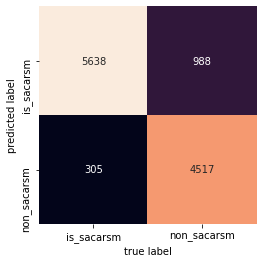

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns;
import numpy as np
import matplotlib.pyplot as plt
target_name=['is_sacarsm','non_sacarsm']
model=make_pipeline(CountVectorizer(),TfidfTransformer(),MultinomialNB())
model.fit(data['headline'],data['is_sarcastic'])
y_model=model.predict(df['headline'])
mat = confusion_matrix(df['is_sarcastic'], y_model)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_name, yticklabels=target_name)
plt.xlabel('true label')
plt.ylabel('predicted label');
print(accuracy_score(df['is_sarcastic'],y_model)) #performance


In [12]:
def predict_category(s,train=data,model=model):
   pred = model.predict(s)
   if (pred==1): print("is_sacarsm")
   else: print("non_sarcasm")
predict_category(["it was, for, uh, medical reasons,’ says doctor to boris johnson, explaining why they had to give him haircut"])

non_sarcasm


SVM

In [45]:
from sklearn.linear_model import SGDClassifier
text_clf_svm=make_pipeline(CountVectorizer(),TfidfTransformer(),SGDClassifier(random_state=42))
text_clf_svm.fit(data['headline'],data['is_sarcastic'])
predict_svm=text_clf_svm.predict(df['headline'])
accuracy_score(df['is_sarcastic'],predict_svm)

0.8806778476589797

Grid Search


In [39]:
from sklearn.model_selection import GridSearchCV
parameters={ 'CountVectorizer().ngram_range':[(1,1),(1,2)],
              'TfidfTransformer().use_idf': (True,False),
              'MultinomialNB().alpha':(1e-2,1e-3), 
           }
gs_clf=GridSearchCV(model,parameters,n_jobs=-1)
gs_clf.fit(data['headline'],data['is_sarcastic'])
gs_clf.best_score_
gs_clf.best_params_

ValueError: ignored